In [1]:
%pylab
%matplotlib inline

Using matplotlib backend: Qt4Agg
Populating the interactive namespace from numpy and matplotlib


In [2]:
import pandas as pd

#from IPython.display import display
#from IPython.core.pylabtools import figsize, getfigs
import scipy.stats

Se añade la carpeta 'funciones' al PYTHONPATCH

In [3]:
import sys, os
#sys.path.append('../funciones')

#import inspect
 # realpath() will make your script run, even if you symlink it :)
#cmd_folder = os.path.realpath(os.path.abspath(os.path.split(inspect.getfile( inspect.currentframe() ))[0]))
cmd_folder = os.path.realpath('funciones')
if cmd_folder not in sys.path:
    sys.path.insert(0, cmd_folder)

from fun_bootstrap import *
from fun_plothist import *
import aeronettools as at
import aeronettools2 as at2
#import aeronettools_pynb as at3
from aeronettools_pynb import extract_aeronet_data
from fun_check import *

In [4]:
# Autocarga del modulo aeronettools_pynb
%load_ext autoreload
%aimport aeronettools_pynb
%aimport aeronettools
%aimport aeronettools2
#%aimport fun_bootstrap
%aimport fun_bootstrap
%aimport fun_plothist
%aimport fun_check
%autoreload 1

# MURCIA 2013

In [5]:
file_default = '/spred/pn32/Renovables/Red/Aeronet/lev15/130101_131231_Murcia.lev15'
FILE = '130101_131231_Murcia.lev15'

if os.path.isfile(file_default):
    FILE = file_default
elif not os.path.isfile(FILE):
    url = 'http://aeronet.gsfc.nasa.gov/zip_files/130101_131231_Murcia.zip'
    zFILE = FILE.replace('lev15', 'zip')
    
    import urllib
    urllib.URLopener().retrieve(url, zFILE)
    
    #import urllib2
    #file_name = url.split('/')[-1]
    #u = urllib2.urlopen(url)
    #f = open(file_name, 'wb')
    #meta = u.info()
    #file_size = int(meta.getheaders("Content-Length")[0])
    #print "Downloading: %s Bytes: %s" % (file_name, file_size)
    #
    #file_size_dl = 0
    #block_sz = 8192
    #while True:
    #    buffer = u.read(block_sz)
    #    if not buffer:
    #        break
    #
    #    file_size_dl += len(buffer)
    #    f.write(buffer)
    #    status = r"%10d  [%3.2f%%]" % (file_size_dl, file_size_dl * 100. / file_size)
    #    status = status + chr(8)*(len(status)+1)
    #    #print status,
    #
    #f.close()
    
    import zipfile    
    zfile = zipfile.ZipFile(zFILE)
    zfolder = os.path.dirname(os.path.realpath(zFILE))
    zfile.extractall(zfolder)
    # os.getcwd()
    zfile.close()
    
    os.remove(zFILE)

Filtrado de los datos con el algorítmo de AEMet llamado aeronettools.py.
Se ha modificado algunos parámetros para tener datos en todos los meses del año.

In [6]:
file_aeronet_Murcia = FILE
df_out_Murcia = at2.extract_aeronet_data(file_aeronet_Murcia)
df_out_Murcia['month'] = df_out_Murcia.index.month

aodMen_Murcia = [df_out_Murcia[df_out_Murcia['month']==i]['AOT_500'].mean() for i in range(1,13)]
dataAODmen_Murcia = [len(df_out_Murcia[df_out_Murcia['month']==i]['AOT_500']) for i in range(1,13)]
df_Murcia = pd.DataFrame({'AODmean_Murcia':aodMen_Murcia, 'number of AOD data':dataAODmen_Murcia })
df_Murcia

,AODmean_Murcia,number of AOD data
0,0.037084,80
1,0.056487,121
2,0.058808,100
3,0.104211,98
4,0.135081,157
5,0.160551,259
6,0.187269,338
7,0.202397,213
8,0.168832,136
9,0.135315,133


Representación de los datos

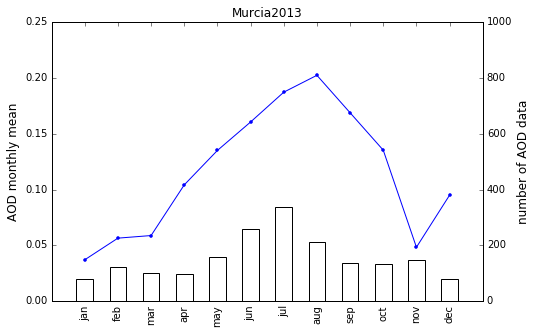

In [7]:
pylab.figure(figsize=(17,5))
ax = plt.subplot(121)
#ax = df_Murcia.plot(y = 'AODmean_Murcia', marker='.')
ax.plot(df_Murcia.index.values, df_Murcia['AODmean_Murcia'], marker='.')
ax2 = df_Murcia['number of AOD data'].plot(kind = 'bar', secondary_y=True, color ='white', 
                                           align='center')
#ax2 =df_Murcia.plot(y = 'number of AOD data', secondary_y=True)

ax.set_ylabel("AOD monthly mean", fontsize=12)
ax2.set_ylabel("number of AOD data", fontsize=12)

#ax.set_ylim(-150,200)
width = 0.3
ind = np.arange(len(dataAODmen_Murcia))
#rects1 = ax2.bar(ind, dataAODmen_Murcia, width, color='white', align='center')
xTickMarks = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep',
               'oct', 'nov', 'dec']
ax.set_xticks(ind)
ax.set_ylim(0,0.25)
ax2.set_ylim(0,1000)
xtickNames = ax.set_xticklabels(xTickMarks) 
ax.set_xlim(-1,12)
ax2.set_xlim(-1,12)
                
#bar_label(rects1, dataAODmen_Murcia)
ax.set_title('Murcia2013')

Mean of sample data: 
0.134623338969
Bootstrapped 95% confidence interval of Mean: 
[0.13030805179817498, 0.13902493585614598]
--------------------------------------------------


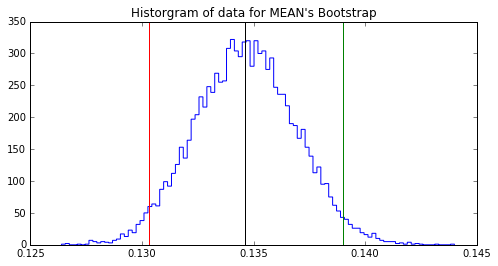

In [8]:
x = df_out_Murcia['AOT_500'].values

# find mean 95% CI and 10,000 bootstrap samples
stat_mean, ci_mean = bootstrap(x, np.mean)
obs_mean = np.mean(x)

print "Mean of sample data: \n", obs_mean
pylab.figure(figsize=(8,4))
#pylab.figure(figsize=(18,4))
#ab = pylab.subplot(121)
plot_bootstrap(stat_mean, ci_mean)
pylab.axvline(obs_mean, c='black')
#ab.set_title('Murcia2013')

mu y sigma:  (0.037083956250000001, 0.015996074733195045)
mu y sigma:  (0.056486512396694208, 0.075342203359141116)
mu y sigma:  (0.058807980000000003, 0.0309174694448721)
mu y sigma:  (0.10421070918367346, 0.046904125169139041)
mu y sigma:  (0.13508058598726111, 0.091927005104025183)
mu y sigma:  (0.16055120270270271, 0.097247064422738158)
mu y sigma:  (0.18726878846153847, 0.088059704667316732)
mu y sigma:  (0.20239741079812204, 0.11410469340921443)
mu y sigma:  (0.16883170588235294, 0.076371755267323968)
mu y sigma:  (0.13531514661654134, 0.065546256859277161)
mu y sigma:  (0.048316212837837831, 0.024207079076358884)
mu y sigma:  (0.095018875000000003, 0.066918059357951906)


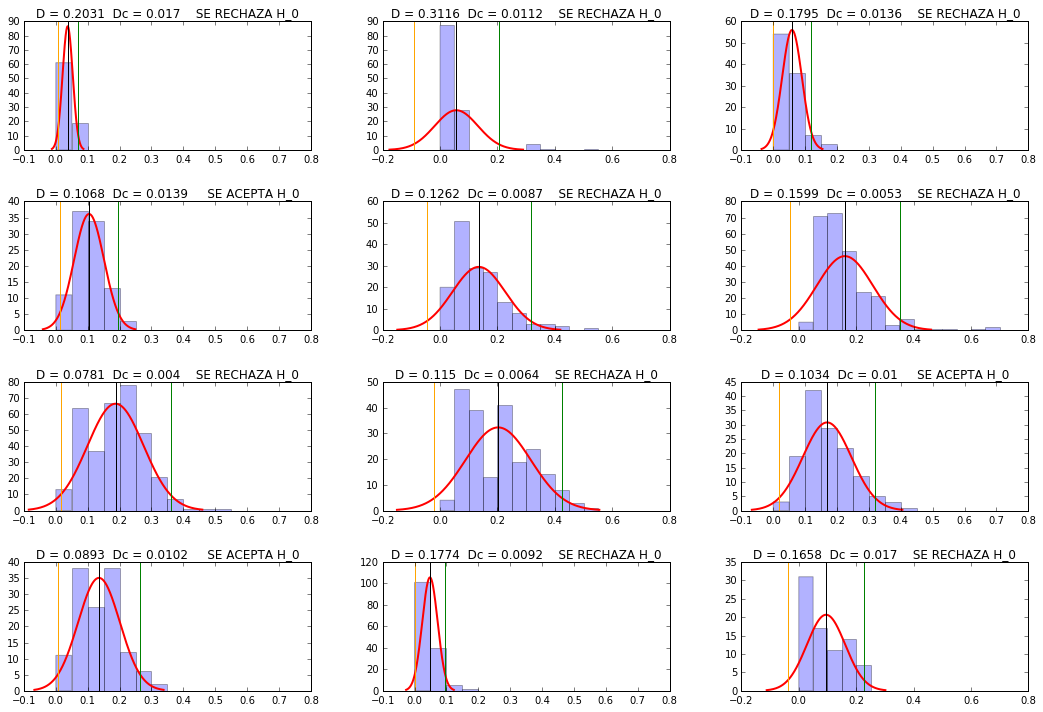

In [9]:
fig, axs = plt.subplots(4,3, figsize=(18, 12))
fig.subplots_adjust(hspace = .4, wspace = .25)

axs = axs.ravel()
for i in range(12):
    pylab.subplot(4,3,i+1)
    PlotHist2(df_out_Murcia[df_out_Murcia['month']==i+1]['AOT_500'], bin=np.arange(0,0.75,0.05), cdf="norm")

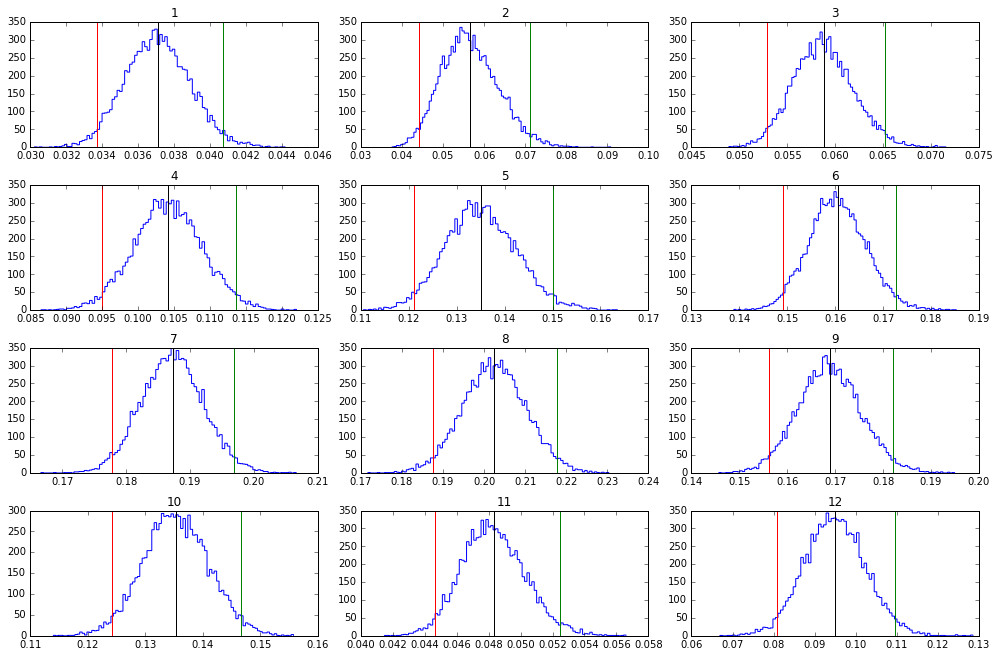

In [10]:
fig, axs = plt.subplots(4,3, figsize=(17, 11))
fig.subplots_adjust(hspace = .3, wspace = .15)

axs = axs.ravel()

for i in range(12):
    x = df_out_Murcia[df_out_Murcia['month']==i+1]['AOT_500'].values
    stat_mean, ci_mean = bootstrap(x, np.mean)
    obs_mean = np.mean(x)
    
    axs[i].hist(stat_mean, 100, histtype='step')
    axs[i].set_title(str(1+i))
    #pylab.hist(stat, 100, histtype='step')
    color = ['red', 'green']
    for j in xrange(2):
        axs[i].axvline(ci_mean[j], c=color[j])
        #pylab.title("Historgram of data for " + statistic.upper() + "\'s Bootstrap")
    axs[i].axvline(obs_mean, c='black')

reading data in file  None ...
-------------------------------------------------------------------
Top 5
-------------------------------------------------------------------
1    beta             	p:  0.0107518556587 	D:  0.0373574103218
2    gamma            	p:  0.00562898864882 	D:  0.0396076248531
3    chi              	p:  0.00023131791096 	D:  0.0492243540352
4    norm             	p:  0.0 	D:  0.112474053354
5    chi2             	p:  0.0 	D:  0.256897289801


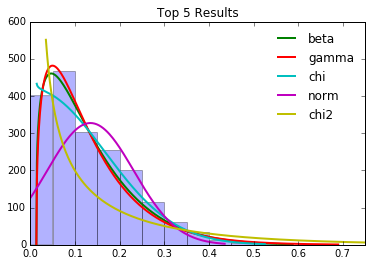

In [11]:
distribution_check(df_out_Murcia['AOT_500'].values, verbose=False)

reading data in file  Month 1 ...
-------------------------------------------------------------------
Top 5
-------------------------------------------------------------------
1    gamma            	p:  0.272231692541 	D:  0.109579889671
2    chi              	p:  0.0730036750878 	D:  0.141643367657
3    t                	p:  0.015154828929 	D:  0.172271925056
4    norm             	p:  0.00227277931935 	D:  0.203098464067
5    beta             	p:  0.000106193186467 	D:  0.244610388892
reading data in file  Month 2 ...
-------------------------------------------------------------------
Top 5
-------------------------------------------------------------------
1    t                	p:  0.0254558190956 	D:  0.132772070227
2    chi2             	p:  0.0238265609644 	D:  0.133780680485
3    beta             	p:  0.00363374336439 	D:  0.159794782042
4    chi              	p:  2.76214160433e-07 	D:  0.252481754221
5    norm             	p:  6.13351591738e-11 	D:  0.311647753361
reading data

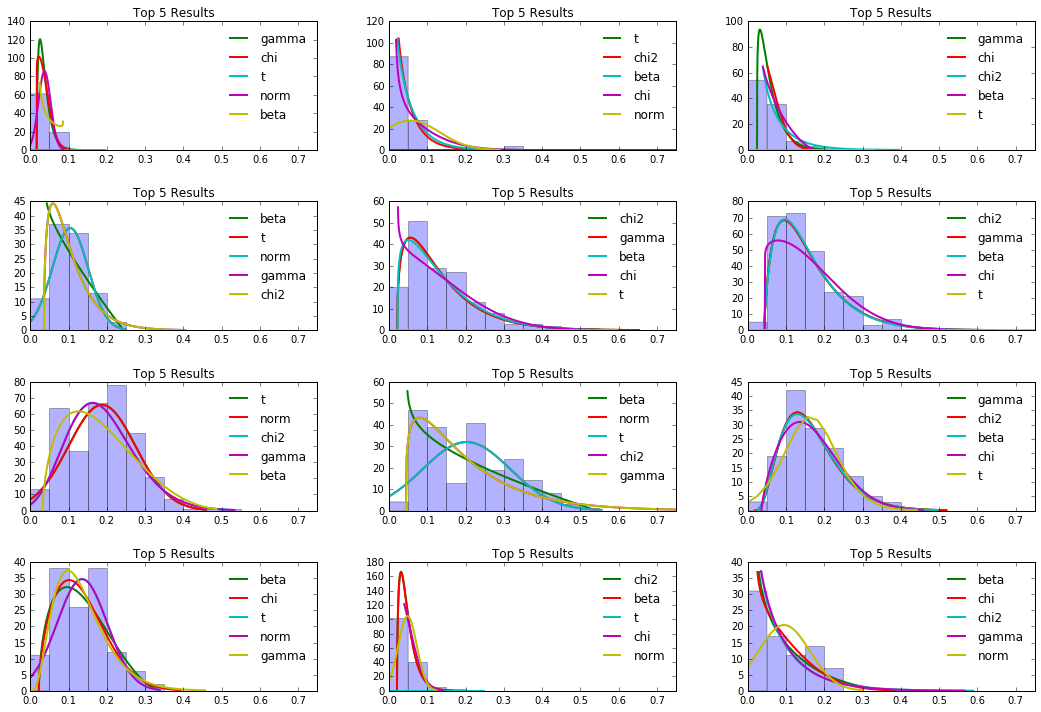

In [12]:
fig, axs = plt.subplots(4,3, figsize=(18, 12))
fig.subplots_adjust(hspace = .4, wspace = .25)

axs = axs.ravel()
for i in range(12):
    pylab.subplot(4,3,i+1)
    distribution_check(df_out_Murcia[df_out_Murcia['month']==i+1]['AOT_500'], verbose=False, name='Month '+str(i+1))